Note: The analysis has been done on the Benchmark Data provided on 18th April 2016. 

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import pylab 

# This allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
Cleaned_Data = pd.read_pickle('../Cleaned_Method_Wise_Data_18thApril2016/LogisticRegression_cleaned.tsv.gz')
Cleaned_Data.head()

,Dataset_Name,Method_Name,Test_Score,C,penalty
0,wine,LogisticRegression,0.333333,0.01,l1
1,wine,LogisticRegression,0.333333,0.01,l1
2,wine,LogisticRegression,0.333333,0.01,l1
3,wine,LogisticRegression,0.333333,0.01,l1
4,wine,LogisticRegression,0.333333,0.01,l1


In [3]:
Cleaned_Data.shape

(72240, 5)

In [4]:
Cleaned_Data['penalty_categorical'] = Cleaned_Data.penalty.map({'l1':0, 'l2':1})
Cleaned_Data.head()

,Dataset_Name,Method_Name,Test_Score,C,penalty,penalty_categorical
0,wine,LogisticRegression,0.333333,0.01,l1,0
1,wine,LogisticRegression,0.333333,0.01,l1,0
2,wine,LogisticRegression,0.333333,0.01,l1,0
3,wine,LogisticRegression,0.333333,0.01,l1,0
4,wine,LogisticRegression,0.333333,0.01,l1,0


# Plot parameters against test scores

In [13]:
Param1=Cleaned_Data['C'].unique().tolist()
Param1

['0.01', '0.1', '0.5', '1.0', '10.0', '50.0', '100.0']

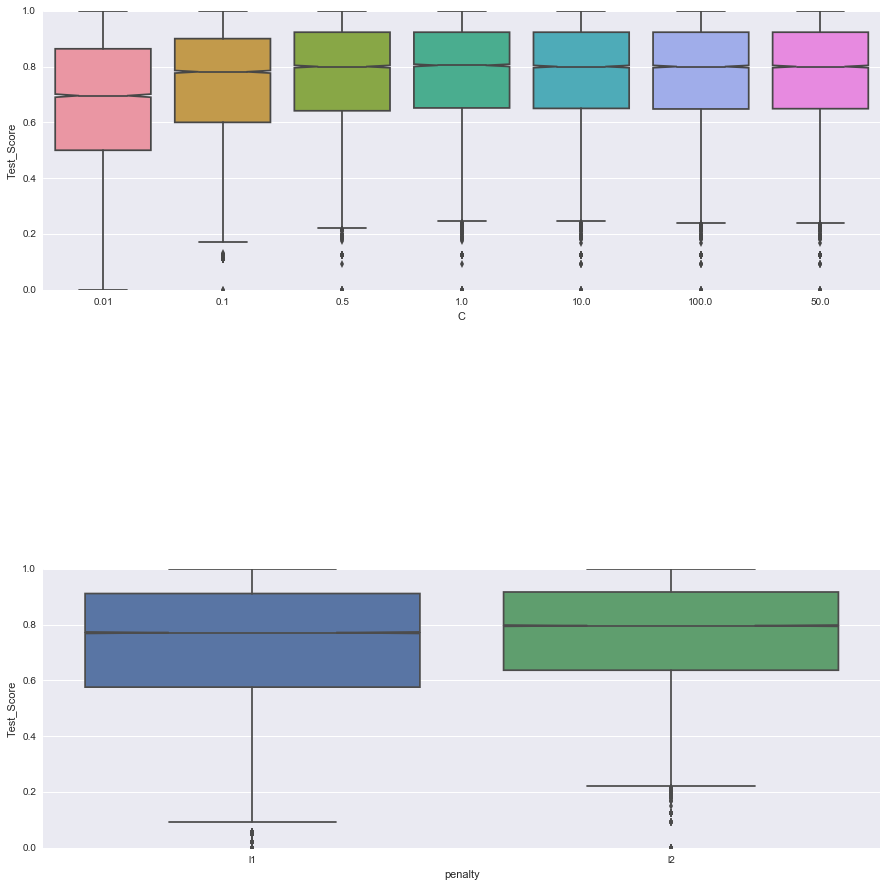

In [28]:
import seaborn as sns
sns.set()
fig, axs = plt.subplots(2,1, sharey=True, figsize=(15,15)) # 3 rows 1 column, figsize controls how big I want the fig to look
fig.subplots_adjust(hspace=1) # Give space between the subplots

#boxplots
sns.boxplot(data=Cleaned_Data, x='C', y='Test_Score', notch='T',ax=axs[0])   #order of the n neighbors has to be sorted out
sns.boxplot(data=Cleaned_Data, x='penalty', y='Test_Score', notch='T',ax=axs[1])

Analysis:

Its very hard to draw any conclusions out of this since the plots are very similar in nature. L2 penalty does slightly better than L1 while probably a value of C=0.001 is the least effective out of the lot.

# Linear Regression on combined dataset

In [6]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Test_Score ~ C + penalty', data=Cleaned_Data).fit()
lm.params
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Test_Score   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 19 Apr 2016   Prob (F-statistic):               0.00
Time:                        01:01:30   Log-Likelihood:                 15297.
No. Observations:               72240   AIC:                        -3.058e+04
Df Residuals:                   72232   BIC:                        -3.050e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.6457      0.002    313.387      0.000         0.642     0.650
C[T.0.1]          0.0806      0.003     29.554      0.000         0.075     0.086
C[T.0.5]          0.1011      0.003     37.099      0.000         0.096     0.106
C[T.1.0]          0.1035      0.003     37.969      0.000         0.098     0.109
C[T.10.0]         0.1040      0.003     38.144      0.000         0.099     0.109
C[T.100.0]        0.1029      0.003     37.767      0.000         0.098     0.108
C[T.50.0]         0.1033      0.003     37.880      0.000         0.098     0.109
penalty[T.l2]     0.0252      0.001     17.315      0.000         0.022     0.028
==============================================================================
Omnibus:                     5499.946   Durbin-Watson:                   0.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6874.408
Skew:                          -0.756   Prob(JB):                         0.00
Kurtosis:                       3.007   Cond. No.                         8.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysis:

R square value is very low! Noticeably the C parameter is weighed more than the penalty parameter. C=10 has highest weights while C=0.1 has the lowest. Note: This is on the basis that C=0.001 has the coefficient value of 0.

# Dividing the dataframe into independent data sets


In [7]:
Dataset_list=Cleaned_Data['Dataset_Name'].unique().tolist()
print(Dataset_list)
DatasetWiseData={}
for Dataset_name in Dataset_list:
    DatasetWiseData[Dataset_name] = Cleaned_Data[Cleaned_Data.Dataset_Name==Dataset_name]

['wine', 'analcatdata_happiness', 'mfeat-factors', 'labor', 'mux6', 'liver-disorder', 'buggyCrx', 'chess', 'analcatdata_famufsu', 'allrep', 'Hill_Valley_with_noise', 'ionosphere', 'solar-flare_1', 'analcatdata_lawsuit', 'vowel', 'shuttle-landing-control-full', 'analcatdata_japansolvent', 'splice', 'agaricus-lepiota', 'prnn_synth', 'Hill_Valley_without_noise', 'new-thyroid', 'hayes-roth', 'molecular-biology_promoters', 'german', 'churn', 'GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1', 'breast-cancer-wisconsin', 'breast', 'analcatdata_germangss', 'hepatitis', 'waveform-21', 'soybean', 'GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1', 'promoters', 'sat', 'tutorial', 'analcatdata_donner', 'spect', 'analcatdata_cyyoung9302', 'crx', 'car', 'connect-4', 'postoperative-patient-data', 'prnn_cushings', 'xd6', 'analcatdata_boxing2', 'mfeat-karhunen', 'threeOf9', 'schizo', 'glass', 'analcatdata_chall2', 'iris', 'analcatdata_boxing1', 'haberman', 'spectf', 'tic-tac-toe', 'parity5', 'lymphography', 'nur

In [8]:
len(Dataset_list)

172

What we can do is to run a regression model of Test Score vs the Data sets to see which datasets are weighed more with respect to others and perform individual analysis on those datasets since there are 172 data sets here!

In [ ]:
# Save the file

import os
os.mkdir('../Cleaned_Method_Wise_Data_18thApril2016/LogisticRegression_cleaned')
DatasetWiseData['wine'].to_pickle('../Cleaned_Method_Wise_Data_18thApril2016/LogisticRegression_cleaned/wine.tsv.gz')

In [ ]:
# Read the file

Dataset_DTC_Type = pd.read_pickle('../Cleaned_Method_Wise_Data_18thApril2016/LogisticRegression_cleaned/wine.tsv.gz')
print(Dataset_DTC_Type)

# Plotting and Linear Regression Analysis performed data wise

In [ ]:
# Loop through the entire files in the folder, open then and run the codes....

import os
indir = '../Cleaned_Method_Wise_Data_18thApril2016/LogisticRegression_cleaned/'
for root, dirs, filenames in os.walk(indir):
     for f in filenames:
        print(f)
        Dataset_Cleaned_Data = pd.read_pickle(indir+f)
        plt.figure()   
        sns.boxplot(data=Dataset_Cleaned_Data, x='C', y='Test_Score', notch='T')
        sns.plt.title(f)
        plt.figure() 
        sns.boxplot(data=Dataset_Cleaned_Data, x='penalty', y='Test_Score', notch='T')
        lm = smf.ols(formula='Test_Score ~ C + penalty', data=Dataset_Cleaned_Data).fit()
        print(lm.summary())

Analysis: